In [1]:
import numpy as np
from matplotlib import pyplot as plt
import glob

In [2]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

plt.style.use('seaborn')

nice_fonts = {
        # Use LaTeX to write all text
        "text.usetex": True,
        "font.family": "serif",
        # Use 10pt font in plots, to match 10pt font in document
        "axes.labelsize": 16,
        "font.size": 16,
        # Make the legend/label fonts a little smaller
        "legend.fontsize": 14,
        "xtick.labelsize": 14,
        "ytick.labelsize": 14,
}

matplotlib.rcParams.update(nice_fonts)

In [3]:
flist = sorted(glob.glob('./tau_*'))

In [4]:
tau_sink = []
for f in flist:
    tau_sink.append(np.genfromtxt(f))

In [5]:
flist = sorted(glob.glob('./acc_*'))
acc_sink = []
for f in flist:
    acc_sink.append(np.genfromtxt(f))

In [6]:
demos = np.arange(1,720,50,dtype='int')

In [7]:
# Baseline (no generalisation)

from itertools import permutations
from scipy.stats import kendalltau
perms = np.array(list(permutations(np.arange(6),6)))

baseline_tau = []
baseline_acc = []
for d in demos:
    perms_copy = np.copy(perms)
    perms_shuffled = np.copy(perms_copy[d:,:])
    np.random.shuffle(perms_shuffled)
    perms_copy[d:,:] = perms_shuffled
    tau_list = []
    acc_list = []
    for k in range(perms.shape[0]):
        tau,p = kendalltau(perms[k,:],perms_copy[k,:])
        tau_list.append(tau)
        acc = np.array_equal(perms[k,:],perms_copy[k,:])
        acc_list.append(acc)
    baseline_tau.append(tau_list)
    baseline_acc.append(acc_list)
    
hists_baseline = []
for t in np.vstack(baseline_tau):
    h,_ = np.histogram(t,np.linspace(-1,1,10))
    hists_baseline.append(h)

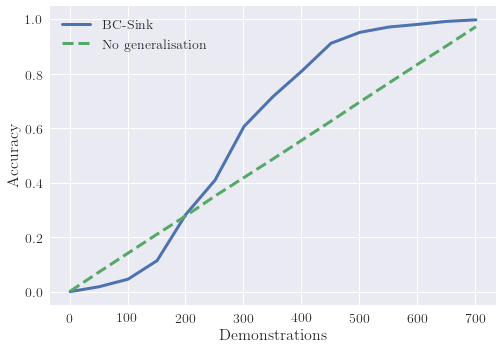

In [8]:
Acc_sink = np.sum(np.vstack(acc_sink),axis=1)/720
Acc_base = np.sum(np.vstack(baseline_acc),axis=1)/720
plt.plot(demos[0:Acc_sink.shape[0]],Acc_sink,linewidth=3,label='BC-Sink')
plt.plot(demos,Acc_base,'--',linewidth=3,label='No generalisation')
plt.ylabel('Accuracy')
plt.xlabel('Demonstrations')
plt.legend()
plt.savefig('Accuracy.pdf')
plt.show()

In [9]:
tmean = np.array([np.mean(t) for t in tau_sink])
tstd = np.array([np.std(t) for t in tau_sink])
num_tests = np.array([t.shape[0] for t in tau_sink])

In [10]:
bmean = np.array([np.mean(t) for t in baseline_tau])
bstd = np.array([np.std(t) for t in baseline_tau])

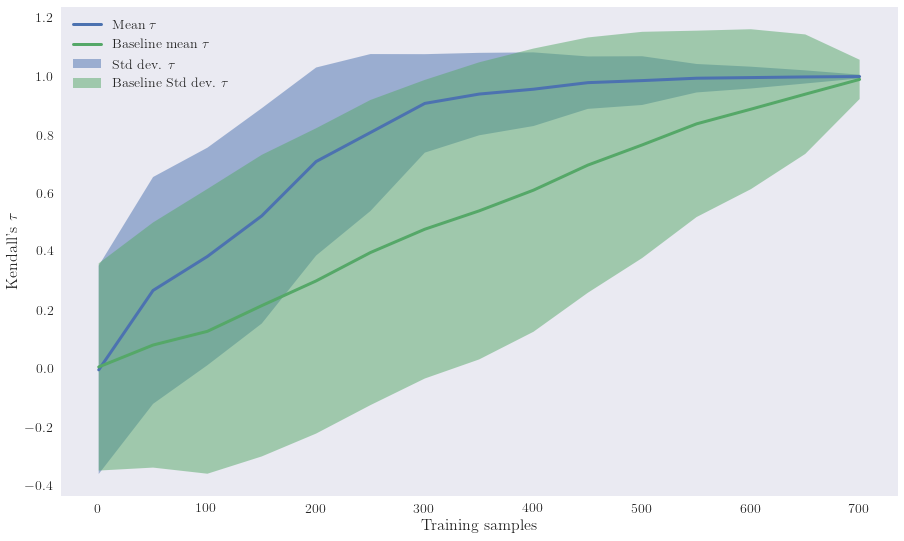

In [11]:
plt.figure(figsize=(15,9))
plt.plot(demos[0:len(tmean)],tmean,linewidth=3,label='Mean $\\tau$')
plt.fill_between(demos[0:len(tmean)],tmean-tstd,tmean+tstd,alpha=0.5,label='Std dev. $\\tau$')
plt.plot(demos[0:len(bmean)],bmean,linewidth=3,label='Baseline mean $\\tau$')
plt.fill_between(demos[0:len(bmean)],bmean-bstd,bmean+bstd,alpha=0.5,label='Baseline Std dev. $\\tau$')

plt.xlabel('Training samples')
plt.ylabel('Kendall\'s $\\tau$')
plt.grid()
plt.legend()
plt.show()

In [12]:
hists = []
for t in tau_sink:
    h,_ = np.histogram(t,np.linspace(-1,1,10))
    hists.append(h)

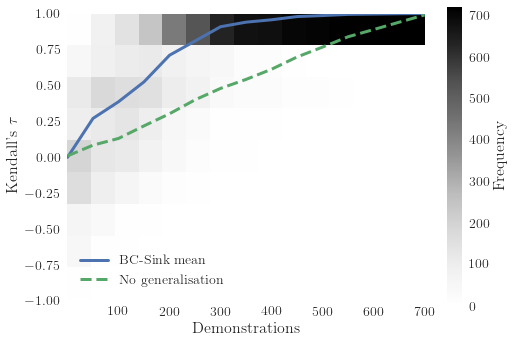

In [13]:
# Compare on Sinkhorn hists
plt.imshow(np.vstack(hists).T,extent=(1,demos[-1],-1,1),aspect=280,origin='lower',vmin=0,vmax=720,interpolation='None')
plt.plot(demos[0:len(tmean)],tmean,linewidth=3,label='BC-Sink mean')
plt.plot(demos,bmean,'--',linewidth=3,label='No generalisation')
plt.colorbar(label='Frequency')
plt.legend(loc='lower left')
plt.grid()
plt.ylabel('Kendall\'s $\\tau$')
plt.xlabel('Demonstrations')

plt.savefig('Generalisation.pdf')
plt.show()

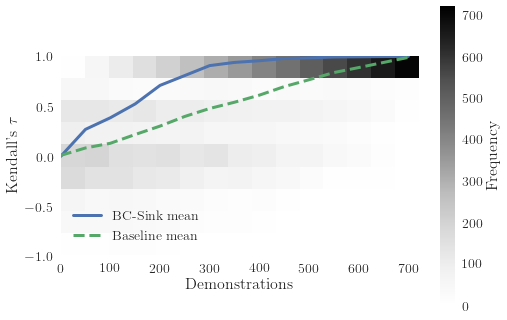

In [14]:
# Compare on baseline hists
plt.imshow(np.vstack(hists_baseline).T,extent=(1,720,-1,1),aspect=200,origin='lower',vmin=0,vmax=720,interpolation='None')
plt.plot(demos[0:len(tmean)],tmean,linewidth=3,label='BC-Sink mean')
plt.plot(demos[0:len(bmean)],bmean,'--',linewidth=3,label='Baseline mean')
plt.colorbar(label='Frequency')
plt.legend(loc='lower left')
plt.grid()
plt.ylabel('Kendall\'s $\\tau$')
plt.xlabel('Demonstrations')
plt.show()